In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', None)

np.random.seed(0)

In [2]:
# converts dataframe into numpy array of correct shape
def convert(df: pd.DataFrame, frame_size=10):
    x = np.asarray(df.iloc[:, 1]).reshape(-1, frame_size)
    return x

In [3]:
######################## TRAINING FLOWSENSE REGRESSION MODEL ####

data_dir = Path("../../Datasets/Smartphone/50cm")
df1 = pd.read_csv(data_dir / "VentOne_0degrees_50cm.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df1 = df1[df1['frequency'] != "clocktime"]
df1 = df1.dropna()
df1 = convert(df1)

df2 = pd.read_csv(data_dir / "VentOne_180degrees_50cm.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = df2[df2['frequency'] != "clocktime"]
df2 = df2.dropna()
df2 = convert(df2)

df3 = pd.read_csv(data_dir / "VentOne_90degrees_50cm.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df3 = df3[df3['frequency'] != "clocktime"]
df3 = df3.dropna()
df3 = convert(df3)


data_dir = Path("../../Datasets/Smartphone/1m") 
df4 = pd.read_csv(data_dir / "VentOne_0degrees_1meter.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df4 = df4[df4['frequency'] != "clocktime"]
df4 = df4.dropna()
df4 = convert(df4)

df5 = pd.read_csv(data_dir / "VentOne_180degrees_1meter.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df5 = df5[df5['frequency'] != "clocktime"]
df5 = df5.dropna()
df5 = convert(df5)

df6 = pd.read_csv(data_dir / "VentOne_90degrees_1meter.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df6 = df6[df6['frequency'] != "clocktime"]
df6 = df6.dropna()
df6 = convert(df6)


data_dir = Path("../../Datasets/Smartphone/1.5m") 
df7 = pd.read_csv(data_dir / "VentOne_0degrees_1-5meter.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df7 = df7[df7['frequency'] != "clocktime"]
df7 = df7.dropna()
df7 = convert(df7)

df8 = pd.read_csv(data_dir / "VentOne_90degrees_1-5meter.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df8 = df8[df8['frequency'] != "clocktime"]
df8 = df8.dropna()
df8 = convert(df8)

df9 = pd.read_csv(data_dir / "VentOne_180degrees_1-5meter.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df9 = df9[df9['frequency'] != "clocktime"]
df9 = df9.dropna()
df9 = convert(df9)


data_dir = Path("../../Datasets/Smartphone/SideVent")
df10 = pd.read_csv(data_dir / "SideVent_0degrees_0cm.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df10 = df10[df10['frequency'] != "clocktime"]
df10 = df10.dropna()
df10 = convert(df10)


data_dir = Path("../../Datasets/Smartphone/2.25m") 
df11 = pd.read_csv(data_dir / "VentOne_0degrees_2-25meters.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df11 = df11[df11['frequency'] != "clocktime"]
df11 = df11.dropna()
df11 = convert(df11)

df12 = pd.read_csv(data_dir / "VentTwo_90degrees_2-25meters.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df12 = df12[df12['frequency'] != "clocktime"]
df12 = df12.dropna()
df12 = convert(df12)

df13 = pd.read_csv(data_dir / "VentOne_180degrees_2-25meters.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df13 = df13[df13['frequency'] != "clocktime"]
df13 = df13.dropna()
df13 = convert(df13)

df14 = pd.read_csv(data_dir / "VentOne_0degrees_2-25meters.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df14 = df14[df14['frequency'] != "clocktime"]
df14 = df14.dropna()
df14 = convert(df14)

In [4]:
def indices(df):
    return df[:3000]

def indicesSmaller(df):
    indices = np.random.choice(df.shape[0], size=400, replace=False, p=None)
    return df[indices, :]

sf1 = indices(df1)
sf2 = indices(df2)
sf3 = indices(df3)
sf4 = indices(df4)
sf5 = indices(df5)
sf6 = indices(df6)
sf7 = indices(df7)
sf8 = indices(df8)
sf9 = indices(df9)
sf10 = indices(df10)
sf11 = indicesSmaller(df11)
sf12 = indicesSmaller(df12)
sf13 = indicesSmaller(df13)
sf14 = indicesSmaller(df14)

In [5]:
df = np.concatenate([sf1, sf2, sf3, sf4, sf5, sf6, sf7, sf8, sf9, sf10, sf11, sf13, sf14], axis=0)

print(df.shape)

(31200, 10)


In [6]:
data = df

In [7]:
X = data[:,:-1]

X = X[:, :6]
X.shape

(31200, 6)

In [8]:
X

array([[ 28.    ,  71.7615,  94.0179,  68.3578,  60.9262,  52.1582],
       [120.    , 168.4581,  33.5244,  72.7755,  62.2254,  55.4052],
       [ 90.    , 147.4408, 149.0217,  73.5421,  70.4557,  33.4743],
       ...,
       [124.    ,  14.069 ,  31.272 ,  22.822 ,  31.241 ,  22.3593],
       [ 52.    ,  65.1001,  22.8497,  48.7572,  19.799 ,   4.797 ],
       [102.    ,  42.0117,  24.2556,  57.0943,  32.8024,  17.3428]])

In [9]:
y = data[:, -1]
y.shape


(31200,)

In [10]:
y

array([4.58, 4.77, 4.06, ..., 5.35, 3.36, 3.82])

In [11]:
print (X.shape, y.shape)

(31200, 6) (31200,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# training the gradient boosting regression model
# Params
params = {'n_estimators': 500,
          'max_depth': 6,
          'min_samples_split': 5,
          'learning_rate': 0.17,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

/Users/adam/miniforge3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.17, loss='ls', max_depth=6,
                          min_samples_split=5, n_estimators=500)

In [14]:
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [15]:
print(y_pred[:5])
print(y_test[:5])

[4.68188648 4.15848929 3.86370828 4.52437464 4.50314806]
[3.59 4.41 5.25 3.15 5.45]


In [16]:
print(y_train_pred[:5])
print(y_train[:5])

[4.88643898 4.12517997 4.40091096 4.00832887 3.60441022]
[6.19 4.32 4.06 3.98 3.08]


In [17]:
print("MSE of test: ", mean_squared_error(y_test, y_pred))
print(y_pred.shape)

print("Test Reg score: ", reg.score(X_test, y_test))
    

MSE of test:  4.4223968331412955
(6240,)
Test Reg score:  0.9209027177089144


In [18]:
print("MSE of training: ",  mean_squared_error(y_train, y_train_pred))

print("Train Reg score: ", reg.score(X_train, y_train))

MSE of training:  0.5365227903390238
Train Reg score:  0.9901672659579782


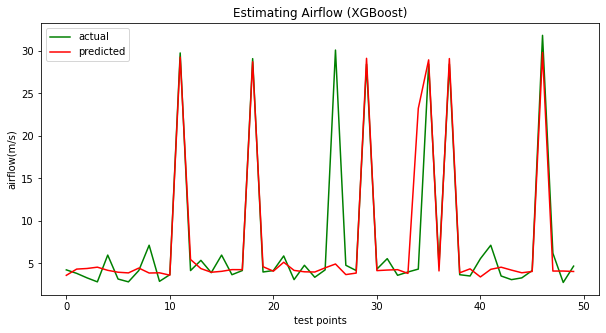

In [19]:
plt.figure(figsize=(10,5))
plt.plot(y_test[50:100], 'g', label="actual")
plt.plot(y_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("test points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
plt.show()

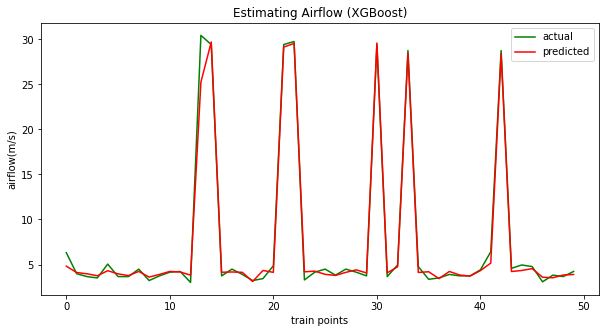

In [20]:
plt.figure(figsize=(10,5))
plt.plot(y_train[50:100], 'g', label="actual")
plt.plot(y_train_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("train points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
plt.show()

In [21]:
# Save regression model to file
from joblib import dump,load
dump(reg, 'flowSenseReg.joblib')

['flowSenseReg.joblib']

In [22]:
######################## TRAINING FLOWSENSE CLASSIFIER MODEL ####

data_dir = Path("../../Datasets/Smartphone/NoAirflowData")
df15 = pd.read_csv(data_dir / "NoAir_Dataset1.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df15 = df15[df15['frequency'] != "clocktime"]
df15 = df15.dropna()
df15 = convert(df15)

df16 = pd.read_csv(data_dir / "NoAir_Dataset2.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df16 = df16[df16['frequency'] != "clocktime"]
df16 = df16.dropna()
df16 = convert(df16)

In [23]:
def indices(df):
    return df[2000:7000]

ones = np.ones(5000).reshape(-1, 1)
zeroes = np.zeros(20000).reshape(-1, 1)

# CREATE LABELED DATA W/ AIRFLOW

sf1 = np.append(indices(df1), ones, 1)
sf4 = np.append(indices(df4), ones, 1)
sf5 = np.append(indices(df5), ones, 1)
sf6 = np.append(indices(df6), ones, 1)
sf7 = np.append(indices(df7), ones, 1)
sf8 = np.append(indices(df8), ones, 1)
sf11 = np.append(indices(df11), ones, 1)
sf14 = np.append(indices(df14), ones, 1)

# CREATE LABELED DATA W/OUT AIRFLOW
sf15 = np.append(df15[:20000], zeroes, 1)
sf16 = np.append(df16[:20000], zeroes, 1)

df = np.concatenate([sf1, sf4, sf5, sf6, sf7, sf8, sf11, sf14, sf15, sf16], axis=0)

np.random.shuffle(df)
print(df.shape)

(80000, 11)


In [24]:
data = df

In [25]:
X = data[:,:-1]

X = X[:, :6]
X

array([[32.    , 18.6973, 32.6738, 32.9348, 74.6726, 23.1788],
       [ 8.    , 14.5519,  6.3246,  9.725 ,  4.    ,  2.9758],
       [22.    , 85.7045,  7.3605,  4.9881,  7.2111, 12.6261],
       ...,
       [18.    , 44.6262, 22.9283, 13.6236, 20.8806, 36.4262],
       [82.    , 24.0604, 49.9252,  9.6609, 77.7946, 35.4049],
       [36.    , 13.7582,  9.6569,  5.8803,  4.    ,  1.7066]])

In [26]:
y = data[:, -1]
y

array([1., 0., 1., ..., 0., 1., 0.])

In [27]:
print(X.shape, y.shape)

(80000, 6) (80000,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
# Params
params = {'learning_rate': 0.2,
          'n_estimators': 500,
          'min_samples_split': 5,
          'max_depth': 6}

clf = GradientBoostingClassifier(**params)
clf.fit(X_train, y_train.ravel())

print('Accuracy from sk-learn: {0}'.format(clf.score(X_test, y_test)))
print("Train score: ", clf.score(X_train, y_train))

Accuracy from sk-learn: 0.911875
Train score:  0.98334375


In [30]:
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [31]:
print(y_pred[:5])
print(y_test[:5])

[1. 0. 1. 1. 1.]
[1. 0. 1. 1. 1.]


In [32]:
print(y_train_pred[:5])
print(y_train[:5])

[0. 0. 1. 1. 1.]
[0. 0. 1. 1. 1.]


In [33]:
print("Test score: ", clf.score(X_test, y_test))

Test score:  0.911875


In [34]:
print("Train score: ", clf.score(X_train, y_train))

Train score:  0.98334375


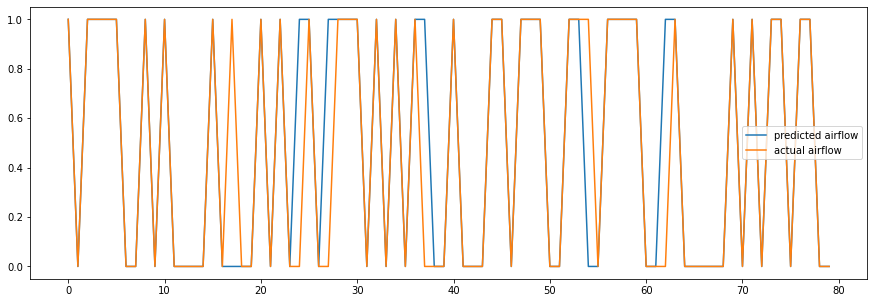

In [35]:
predictions = clf.predict(X_test[:80])
plt.figure(figsize=(15,5))
plt.plot(predictions, label = "predicted airflow")
plt.plot(y_test[:80], label = "actual airflow")
plt.legend()
plt.show()

In [36]:
predictions = clf.predict(X_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[7266  809]
 [ 601 7324]]


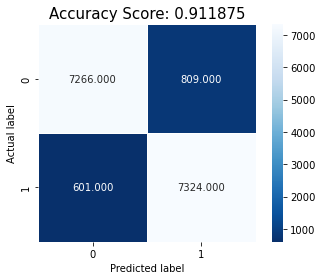

In [37]:
import seaborn as sns

plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
score = clf.score(X_test, y_test)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(clf.predict(X_test), y_test, average='binary')
print("Precision: ", precision)

recall = recall_score(clf.predict(X_test), y_test, average='binary')
print("Recall: ", recall)

f1 = f1_score(clf.predict(X_test), y_test, average='binary')
print("F1 Score: ", recall)

Precision:  0.9241640378548895
Recall:  0.9005287101930407
F1 Score:  0.9005287101930407


In [39]:
precision = precision_score(clf.predict(X_train), y_train, average='binary')
print("Precision: ", precision)

recall = recall_score(clf.predict(X_train), y_train, average='binary')
print("Recall: ", recall)

f1 = f1_score(clf.predict(X_train), y_train, average='binary')
print("F1 Score: ", recall)

Precision:  0.9848791893998441
Recall:  0.9819402567529762
F1 Score:  0.9819402567529762


In [40]:
# Save classification model to file
from joblib import dump,load
dump(clf, 'flowSenseClass.joblib')

['flowSenseClass.joblib']